# PROBLEM STATEMENT


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/UK_traffic_sign_543.svg"
         alt="Real Mona Lisa"  width="400">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Traffic Sign Classification- 
  </td></tr>
</table>




- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 
  - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
  - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
  - (4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
  - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
  - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
  - (10, b'No passing for vehicles over 3.5 metric tons')
  - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
  - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
  - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
  - (18, b'General caution') (19, b'Dangerous curve to the left')
  - (20, b'Dangerous curve to the right') (21, b'Double curve')
  - (22, b'Bumpy road') (23, b'Slippery road')
  - (24, b'Road narrows on the right') (25, b'Road work')
  - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
  - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
  - (31, b'Wild animals crossing')
  - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
  - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
  - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
  - (40, b'Roundabout mandatory') (41, b'End of no passing')
  - (42, b'End of no passing by vehicles over 3.5 metric tons')
- The network used is called LeNet that was presented by Yann LeCun http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

# STEP #0: IMPORT LIBRARIES

In [1]:
!pip install tensorflow-gpu==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle

# STEP #1: IMPORT DATASETS AND NORMALIZE IT

In [3]:
with open('train.p', mode='rb') as training_data:
  training_dataset = pickle.load(training_data)
with open('valid.p', mode='rb') as validation_data:
  validation_dataset = pickle.load(validation_data)
with open('test.p', mode='rb') as testing_data:
  testing_dataset = pickle.load(testing_data)

In [4]:
training_dataset

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [5]:
X_train, y_train = training_dataset['features'], training_dataset['labels']
X_validation, y_validation = validation_dataset['features'], validation_dataset['labels']
X_test, y_test = testing_dataset['features'], testing_dataset['labels']

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

# STEP #2: VISUALIZE DATASET

41

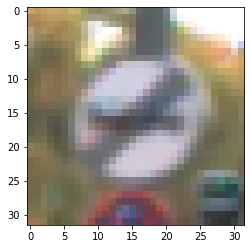

In [8]:
plt.imshow(X_train[100])
y_train[100]

31

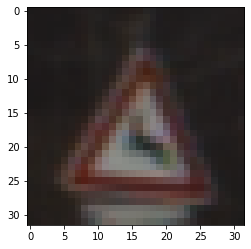

In [9]:
plt.imshow(X_validation[100])
y_validation[100]

1

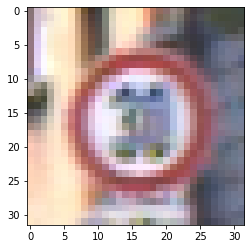

In [10]:
plt.imshow(X_test[100])
y_test[100]

# STEP #3: DATA PREPARATION

In [12]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [13]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True) # Average of pixels
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)  
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True) 

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

In [15]:
X_test_gray.shape

(12630, 32, 32, 1)

In [16]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [17]:
# normalize
X_train_gray_norm = (X_train_gray-128) / 128
X_test_gray_norm = (X_test_gray-128) / 128
X_validation_gray_norm = (X_validation_gray-128) / 128

In [21]:
X_train_gray_norm

array([[[[-0.70052083],
         [-0.70572917],
         [-0.66666667],
         ...,
         [-0.625     ],
         [-0.54166667],
         [-0.54166667]],

        [[-0.70833333],
         [-0.70052083],
         [-0.69270833],
         ...,
         [-0.66145833],
         [-0.59895833],
         [-0.5546875 ]],

        [[-0.68489583],
         [-0.6796875 ],
         [-0.66927083],
         ...,
         [-0.67447917],
         [-0.63541667],
         [-0.63541667]],

        ...,

        [[-0.84375   ],
         [-0.86197917],
         [-0.85416667],
         ...,
         [-0.82291667],
         [-0.84114583],
         [-0.84114583]],

        [[-0.8515625 ],
         [-0.84635417],
         [-0.82291667],
         ...,
         [-0.8203125 ],
         [-0.85416667],
         [-0.85677083]],

        [[-0.84895833],
         [-0.8203125 ],
         [-0.8359375 ],
         ...,
         [-0.79427083],
         [-0.8515625 ],
         [-0.86197917]]],


       [[[-0.5       ],


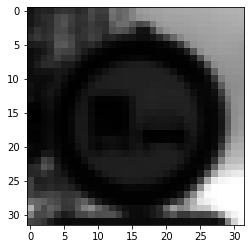

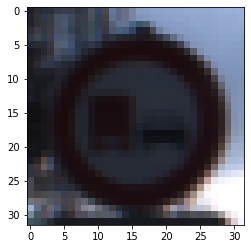

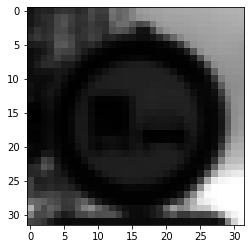

In [22]:
import random
i = random.randrange(0, 1000)
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

# STEP#4: MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [38]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))

model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(43, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [40]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
history = model.fit(X_train_gray_norm, y_train, batch_size=512, epochs=50, validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/50
68/68 [==============================] - 1s 10ms/step - loss: 3.1619 - accuracy: 0.1808 - val_loss: 2.6639 - val_accuracy: 0.2873
Epoch 2/50
68/68 [==============================] - 0s 7ms/step - loss: 1.6244 - accuracy: 0.5524 - val_loss: 1.2788 - val_accuracy: 0.6147
Epoch 3/50
68/68 [==============================] - 0s 6ms/step - loss: 0.8790 - accuracy: 0.7481 - val_loss: 0.9614 - val_accuracy: 0.7136
Epoch 4/50
68/68 [==============================] - 0s 6ms/step - loss: 0.6232 - accuracy: 0.8273 - val_loss: 0.7481 - val_accuracy: 0.7773
Epoch 5/50
68/68 [==============================] - 0s 6ms/step - loss: 0.4861 - accuracy: 0.8686 - val_loss: 0.7050 - val_accuracy: 0.7868
Epoch 6/50
68/68 [==============================] - 0s 6ms/step - loss: 0.4070 - accuracy: 0.8926 - val_loss: 0.6114 - val_accuracy: 0.8145
Epoch 7/50
68/68 [==============================] - 0s 7ms/step - loss: 0.3449 - accuracy: 0.9102 - val_loss: 0.5933 - val_accuracy: 0.8270
Epoch 8/50
68/68 [=

# STEP#5: MODEL EVALUATION

In [42]:
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.1790 - accuracy: 0.8767
Test Accuracy: 0.8767220973968506


In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

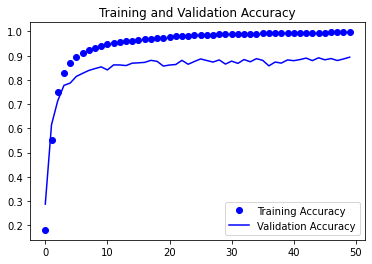

In [45]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

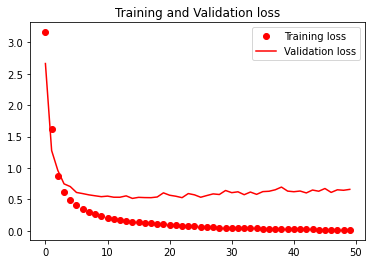

In [46]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [52]:
predicted_classes = model.predict(X_test_gray_norm).argmax(axis=-1)
y_true = y_test

395/395 [==============================] - 1s 2ms/step


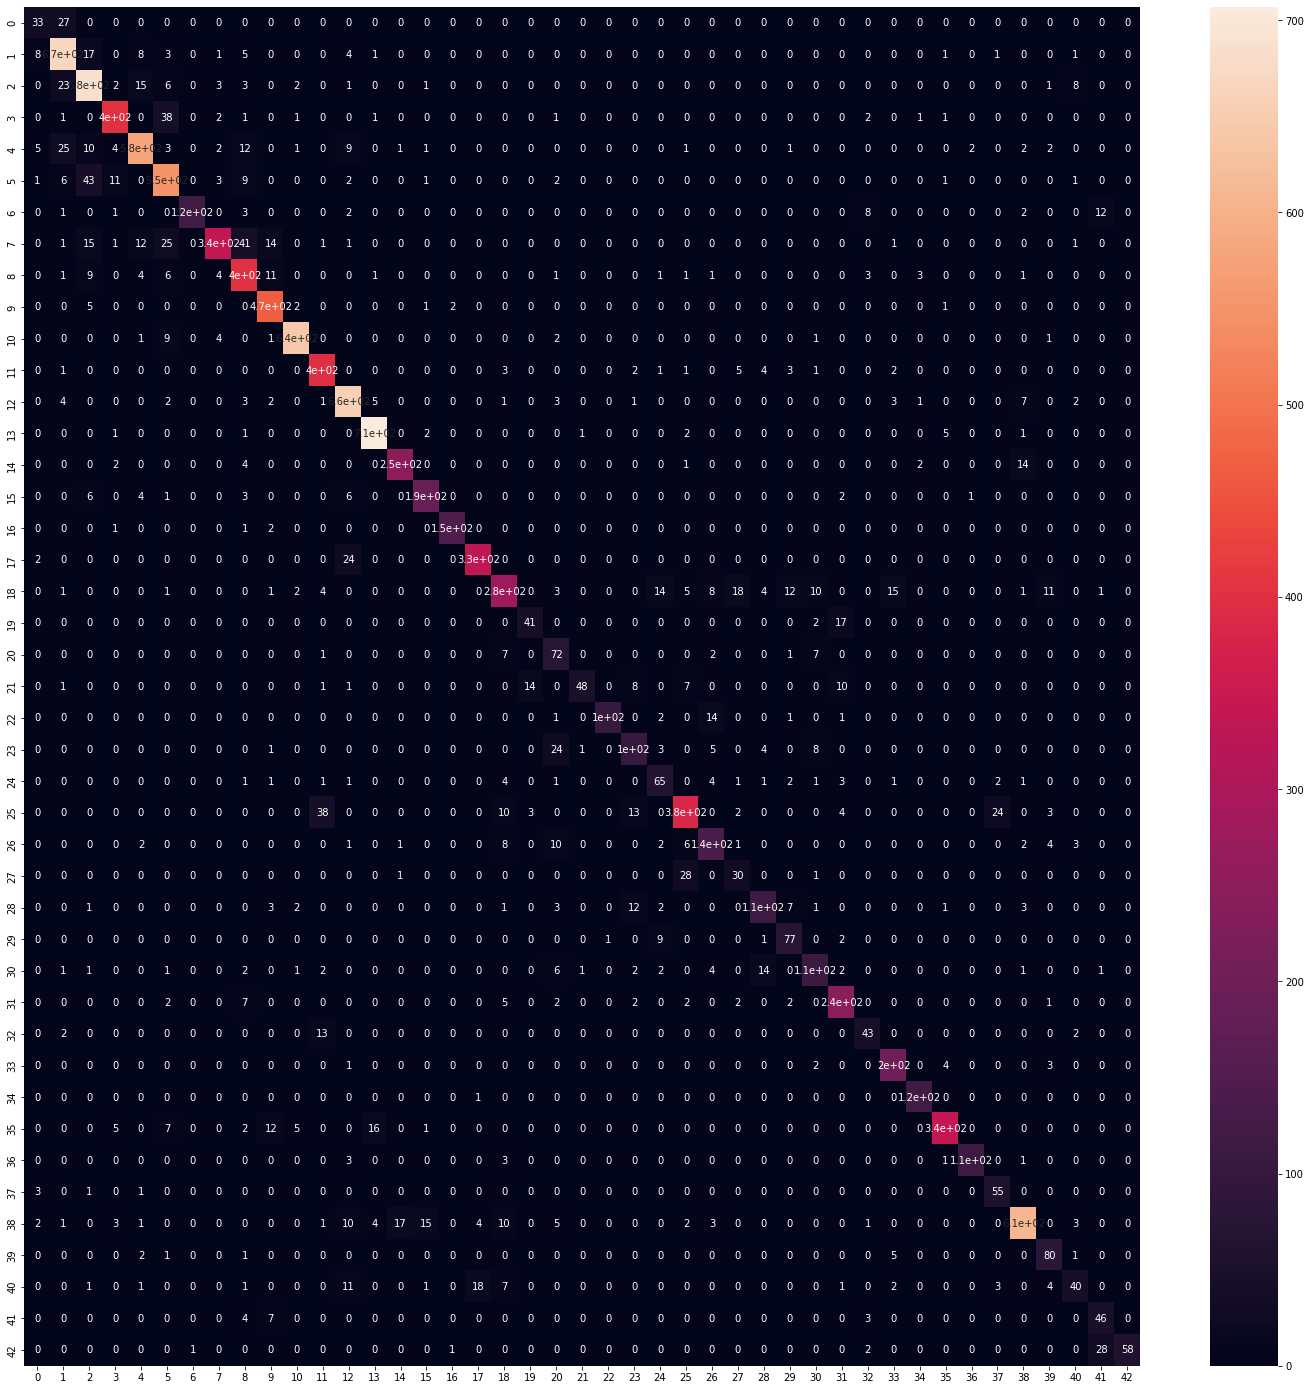

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

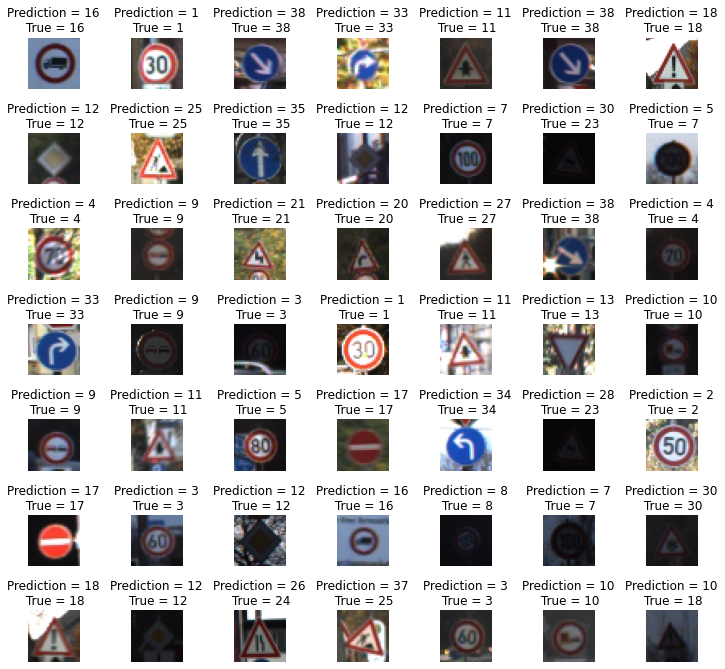

In [54]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    